In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('new_pre.csv')
df

,Unnamed: 0,HAD_ATTACK,HAD_HEARTDIS,HAD_ASTHMA,KIDNEY_DIS,HAD_DIABETES,DIFFWALK,SMOKING100,DRINKSIN_30D,DRINK_FREQ30D,PHYSICH_STATUS,MENTALH_STATUS,HEALTH_INSU,PHYSIC_ACT,SEX,AGE>65,HEAVY_DRINKERS,Adult,WEIGHT_KG
0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1,88.450440
1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1,80.739376
2,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1,98.429464
3,3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,66.224432
4,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1,90.718400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184074,184074,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1,71.667536
184075,184075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,58.966960
184076,184076,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,90.718400
184077,184077,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,77.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1,58.059776


In [4]:
df.drop('Unnamed: 0',inplace=True,axis=1)

# XG Boost

In [5]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, recall_score, classification_report,precision_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier




df = pd.read_csv("new_pre.csv") 
target_col = "HAD_ATTACK"  


X = df.drop(columns=[target_col])
y = df[target_col]



numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(exclude=['int64', 'float64']).columns

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_cols),
    ('cat', categorical_pipeline, categorical_cols)
])


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Handle imbalance with SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_scaled, y_train)



xgb_model = XGBClassifier(
    n_estimators=300,         # number of trees
    learning_rate=0.05,       # smaller LR for stability
    max_depth=6,              # reasonable depth
    subsample=0.8,            # prevent overfitting
    colsample_bytree=0.8,     # feature sampling
    scale_pos_weight=3,       # handle class imbalance
    reg_lambda=1,             # L2 regularization
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    tree_method='hist'        # fast CPU mode (use 'gpu_hist' if GPU available)
)

# Train the model
xgb_model.fit(X_res, y_res)
# ===============================
y_pred = xgb_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision=precision_score(y_test,y_pred)

print(f" Accuracy: {accuracy*100:.2f}%")
print(f" Recall: {recall*100:.2f}%\n")
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Pricsion: {precision*100:.2f}%")



 Accuracy: 85.33%
 Recall: 61.79%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.86      0.92     70654
         1.0       0.16      0.62      0.25      2978

    accuracy                           0.85     73632
   macro avg       0.57      0.74      0.59     73632
weighted avg       0.95      0.85      0.89     73632

Pricsion: 15.99%


# Logistic Regression

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, recall_score
from imblearn.over_sampling import SMOTE



df = pd.read_csv("new_pre.csv")  

target_col = "HAD_ATTACK"  

X = df.drop(columns=[target_col])
y = df[target_col]




X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)


sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_scaled, y_train)


log_reg = LogisticRegression(max_iter=500000, class_weight='balanced', random_state=42)
log_reg.fit(X_res, y_res)



y_pred = log_reg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision=precision_score(y_test,y_pred)

print(f" Accuracy: {accuracy*100:.2f}%")
print(f" Recall: {recall*100:.2f}%\n")
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Pricsion: {precision*100:.2f}%")



 Accuracy: 84.45%
 Recall: 71.19%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.85      0.91     70654
         1.0       0.17      0.71      0.27      2978

    accuracy                           0.84     73632
   macro avg       0.58      0.78      0.59     73632
weighted avg       0.95      0.84      0.89     73632

Pricsion: 16.68%


# Multilayer Perceptron

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, classification_report
import pandas as pd
import numpy as np



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")




df = pd.read_csv("finalpre.csv")
target_col = "HAD_ATTACK"

X = df.drop(columns=[target_col])
y = df[target_col]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


smote = SMOTE(sampling_strategy=1, random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

print("After SMOTE:", np.bincount(y_train_res.astype(int)))

# Convert to tensor
X_train_tensor = torch.tensor(X_train_res, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train_res.values.astype(int), dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values.astype(int), dtype=torch.long).to(device)

train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=128, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=256, shuffle=False)





class AttentionLayer(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.attn = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.Tanh(),
            nn.Linear(input_dim, 1)
        )

    def forward(self, x):
        weights = torch.softmax(self.attn(x), dim=1)
        context = torch.sum(weights * x, dim=1)
        return context

class MLPWithAttention(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.attn = AttentionLayer(input_dim)
        self.net = nn.Sequential(
            nn.Linear(input_dim + input_dim, 256),  # concat input + context
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 2)
        )

    def forward(self, x):
        context = self.attn(x)
        out = torch.cat([x, context.unsqueeze(1).repeat(1, x.shape[1])], dim=1)
        return self.net(out)

model = MLPWithAttention(X_train_scaled.shape[1]).to(device)


class_weights = torch.tensor([1.0, 3.0], dtype=torch.float32).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)
epochs = 200




for epoch in range(epochs):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}")




model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        preds = model(xb)
        y_true.extend(yb.cpu().numpy())
        y_pred.extend(torch.argmax(preds, dim=1).cpu().numpy())


acc = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
print(f"\n Accuracy: {acc*100:.2f}%")
print(f" Recall: {recall*100:.2f}%")
print("\n Classification Report:\n", classification_report(y_true, y_pred))

Using device: cuda
After SMOTE: [141306 141306]
Epoch 1/200, Loss: 0.3834
Epoch 2/200, Loss: 0.3689
Epoch 3/200, Loss: 0.3583
Epoch 4/200, Loss: 0.3489
Epoch 5/200, Loss: 0.3406
Epoch 6/200, Loss: 0.3333
Epoch 7/200, Loss: 0.3261
Epoch 8/200, Loss: 0.3205
Epoch 9/200, Loss: 0.3143
Epoch 10/200, Loss: 0.3108
Epoch 11/200, Loss: 0.3058
Epoch 12/200, Loss: 0.3021
Epoch 13/200, Loss: 0.2985
Epoch 14/200, Loss: 0.2952
Epoch 15/200, Loss: 0.2930
Epoch 16/200, Loss: 0.2901
Epoch 17/200, Loss: 0.2875
Epoch 18/200, Loss: 0.2859
Epoch 19/200, Loss: 0.2839
Epoch 20/200, Loss: 0.2819
Epoch 21/200, Loss: 0.2796
Epoch 22/200, Loss: 0.2777
Epoch 23/200, Loss: 0.2769
Epoch 24/200, Loss: 0.2745
Epoch 25/200, Loss: 0.2741
Epoch 26/200, Loss: 0.2720
Epoch 27/200, Loss: 0.2701
Epoch 28/200, Loss: 0.2691
Epoch 29/200, Loss: 0.2668
Epoch 30/200, Loss: 0.2663
Epoch 31/200, Loss: 0.2649
Epoch 32/200, Loss: 0.2639
Epoch 33/200, Loss: 0.2632
Epoch 34/200, Loss: 0.2605
Epoch 35/200, Loss: 0.2594
Epoch 36/200, Lo

In [23]:
pre = precision_score(y_true, y_pred)
print(f"📈 precision: {pre*100:.2f}%")

📈 precision: 12.69%


# Random Forest

In [ ]:


import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    classification_report, confusion_matrix
)
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline




preprocessor = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])





base_model = RandomForestClassifier(
    n_estimators=500,          # more trees → smoother decisions
    max_depth=30,              # slightly deeper for complex patterns
    min_samples_split=4,       # prevents overfitting
    min_samples_leaf=2,
    max_features='sqrt',       # decorrelates trees → better generalization
    class_weight={0: 1, 1: 4},   # bias toward positive class → higher recall
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)




skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

acc_scores, rec_scores, prec_scores, f1_scores = [], [], [], []

fold = 1
for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Preprocess
    X_train_scaled = preprocessor.fit_transform(X_train)
    X_test_scaled = preprocessor.transform(X_test)

    # Balance data
    sm = SMOTE(random_state=42, k_neighbors=3)
    X_res, y_res = sm.fit_resample(X_train_scaled, y_train)

    # Train
    model = base_model
    model.fit(X_res, y_res)

    # Predict
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    threshold = 0.35  # test between 0.3–0.4
    y_pred = (y_proba >= threshold).astype(int)


    # Metrics
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    acc_scores.append(acc)
    rec_scores.append(rec)
    prec_scores.append(prec)
    f1_scores.append(f1)

    print(f"\n===== Fold {fold} Results =====")
    print(f"Accuracy : {acc*100:.2f}%")
    print(f"Precision: {prec*100:.2f}%")
    print(f"Recall   : {rec*100:.2f}%")
    print(f"F1 Score : {f1*100:.2f}%")
    fold += 1



print("\n===================================================")
print("Averaged Performance (5-Fold Cross-Validation)")
print("===================================================")
print(f"Mean Accuracy : {np.mean(acc_scores)*100:.2f}% ± {np.std(acc_scores)*100:.2f}")
print(f"Mean Precision: {np.mean(prec_scores)*100:.2f}% ± {np.std(prec_scores)*100:.2f}")
print(f"Mean Recall   : {np.mean(rec_scores)*100:.2f}% ± {np.std(rec_scores)*100:.2f}")
print(f"Mean F1 Score : {np.mean(f1_scores)*100:.2f}% ± {np.std(f1_scores)*100:.2f}")




X_scaled = preprocessor.fit_transform(X)
sm = SMOTE(random_state=42, k_neighbors=3)
X_res, y_res = sm.fit_resample(X_scaled, y)

final_model = base_model.fit(X_res, y_res)
print("Final RandomForest model trained on full balanced data.")



===== Fold 1 Results =====
Accuracy : 85.61%
Precision: 16.21%
Recall   : 61.38%
F1 Score : 25.65%

===== Fold 2 Results =====
Accuracy : 86.71%
Precision: 17.01%
Recall   : 58.90%
F1 Score : 26.39%

===== Fold 3 Results =====
Accuracy : 85.84%
Precision: 16.30%
Recall   : 60.44%
F1 Score : 25.67%

===== Fold 4 Results =====
Accuracy : 86.54%
Precision: 16.75%
Recall   : 58.59%
F1 Score : 26.05%

===== Fold 5 Results =====
Accuracy : 86.24%
Precision: 16.99%
Recall   : 61.85%
F1 Score : 26.66%

🔍 Averaged Performance (5-Fold Cross-Validation)
Mean Accuracy : 86.19% ± 0.41
Mean Precision: 16.65% ± 0.34
Mean Recall   : 60.23% ± 1.30
Mean F1 Score : 26.08% ± 0.40

✅ Final RandomForest model trained on full balanced data.


# Ensemnble Model

[LightGBM] [Info] Number of positive: 5957, number of negative: 141306
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006659 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 147263, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040451 -> initscore=-3.166361
[LightGBM] [Info] Start training from score -3.166361
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

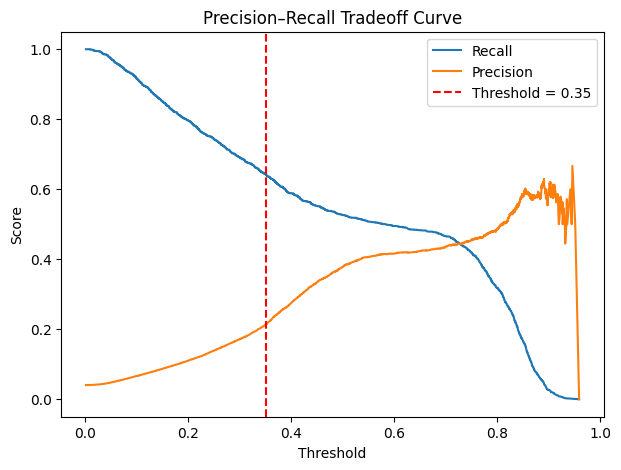

In [ ]:




import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix,
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, precision_recall_curve
)
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt




for col in list(df.columns):
    if col.lower().startswith("unnamed"):
        df.drop(columns=[col], inplace=True)



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)




def clean_columns(df):
    df.columns = [re.sub(r'[^A-Za-z0-9_]+', '_', col) for col in df.columns]
    return df

X_train = clean_columns(X_train)
X_test = clean_columns(X_test)



pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

xgb = XGBClassifier(
    n_estimators=800,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    scale_pos_weight=pos_weight,
    eval_metric='logloss',
    tree_method='hist',
    random_state=42
)

lgb = LGBMClassifier(
    n_estimators=800,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    scale_pos_weight=pos_weight,
    objective='binary',
    random_state=42
)

cat = CatBoostClassifier(
    iterations=800,
    learning_rate=0.03,
    depth=6,
    class_weights=[1, 3],   # more weight to positive class
    verbose=0,
    random_seed=42
)

# ------------------------------------------------------------
#  Build the ensemble (soft voting)
# ------------------------------------------------------------
ensemble = VotingClassifier(
    estimators=[
        ('xgb', xgb),
        ('lgb', lgb),
        ('cat', cat)
    ],
    voting='soft',
    weights=[1, 1, 2]  # Slightly more weight to CatBoost (usually better recall)
)




ensemble.fit(X_train, y_train)




y_pred_proba = ensemble.predict_proba(X_test)[:, 1]

threshold = 0.35   # Try 0.3–0.4 range for best recall
y_pred_thresh = (y_pred_proba >= threshold).astype(int)





print(f"\nEnsemble Model Performance (Threshold {threshold:.2f}):")
print(classification_report(y_test, y_pred_thresh, digits=3))

cm = confusion_matrix(y_test, y_pred_thresh)
cm_df = pd.DataFrame(cm, index=['Actual_0', 'Actual_1'], columns=['Pred_0', 'Pred_1'])
print("\nConfusion Matrix:")
print(cm_df)

print("\nAdditional Metrics:")
print(f"Accuracy  : {accuracy_score(y_test, y_pred_thresh):.3f}")
print(f"Precision : {precision_score(y_test, y_pred_thresh):.3f}")
print(f"Recall    : {recall_score(y_test, y_pred_thresh):.3f}")
print(f"F1 Score  : {f1_score(y_test, y_pred_thresh):.3f}")
print(f"ROC AUC   : {roc_auc_score(y_test, y_pred_proba):.3f}")




prec, rec, thresh = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(7, 5))
plt.plot(thresh, rec[:-1], label='Recall')
plt.plot(thresh, prec[:-1], label='Precision')
plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold = {threshold}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision–Recall Tradeoff Curve')
plt.show()


# SVM

Accuracy : 0.881654715341156
Recall   : 0.6608462055070518
Precision: 0.20347394540942929
F1-Score : 0.31114624505928856


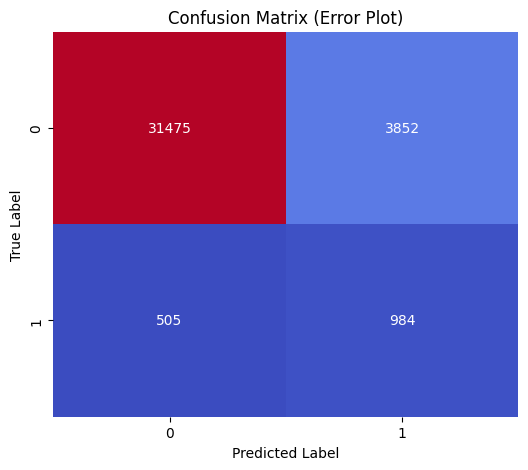

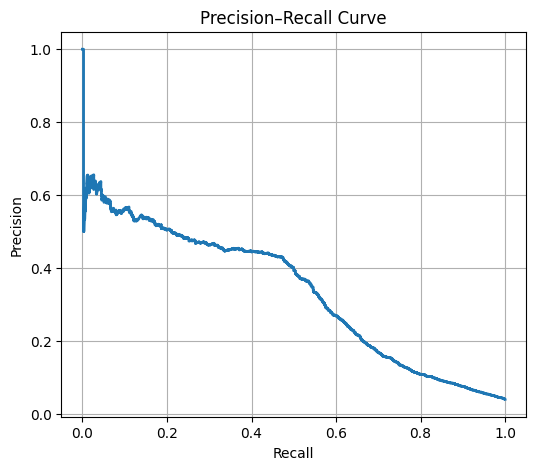

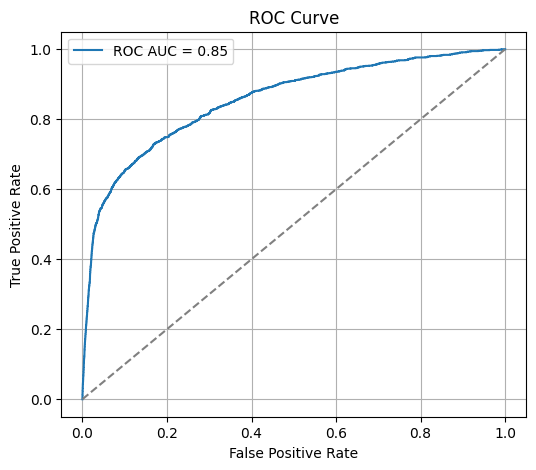

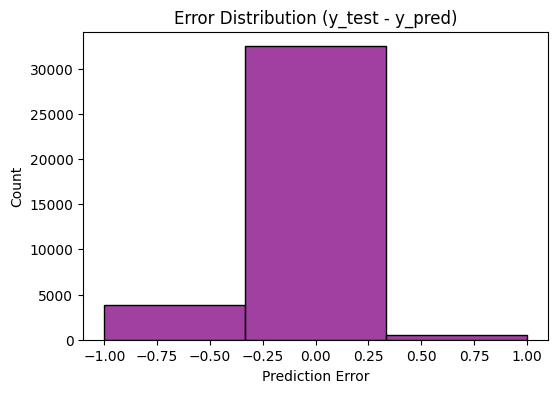

In [32]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    confusion_matrix, roc_curve, auc, precision_recall_curve
)
import seaborn as sns
from sklearn.model_selection import train_test_split

clf = LinearSVC(
    C=0.001,
    class_weight='balanced',
    max_iter=20000,
    dual=False,
    penalty='l1'
)
clf.fit(X_train, y_train)



y_dec = clf.decision_function(X_test)
y_pred = (y_dec >= 0.01).astype(int)


print("Accuracy :", accuracy_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1-Score :", f1_score(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title("Confusion Matrix (Error Plot)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



precision, recall, thresholds = precision_recall_curve(y_test, y_dec)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, linewidth=2)
plt.title("Precision–Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.show()



fpr, tpr, thresholds = roc_curve(y_test, y_dec)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


errors = y_test - y_pred
plt.figure(figsize=(6, 4))
sns.histplot(errors, kde=False, color='purple', bins=3)
plt.title("Error Distribution (y_test - y_pred)")
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.show()
